# Uniroot test

## Données

In [1]:
import os
os.chdir("D:/Bureau/PythonProject/packages/scientisttseries/data")

# Chargement des données
import pandas as pd

df = pd.read_excel("c5ex2.xls",header=0,index_col=0)
df.index = pd.date_range(start="2000-01-31",periods=len(df),freq="M")
df.head()

,TOTPHAR,TOTPHARSA
2000-01-31,1766.329705,1628.372370
2000-02-29,1799.817447,1793.320963
2000-03-31,2022.353306,1847.212570
2000-04-30,1762.868650,1845.445843
2000-05-31,1883.066309,1945.822600


### Représentation graphique

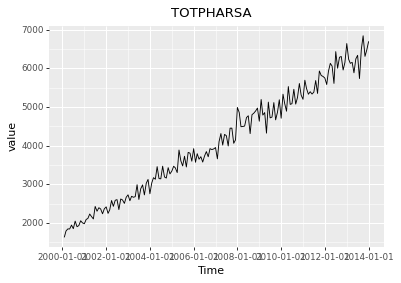

In [2]:
# Représentation graphique
import plotnine as pn
from scientisttseries.tsaplots import ggtsplot
data = df["TOTPHARSA"]
p = ggtsplot(data)
print(p)

### Aucorrelation simple et partielle

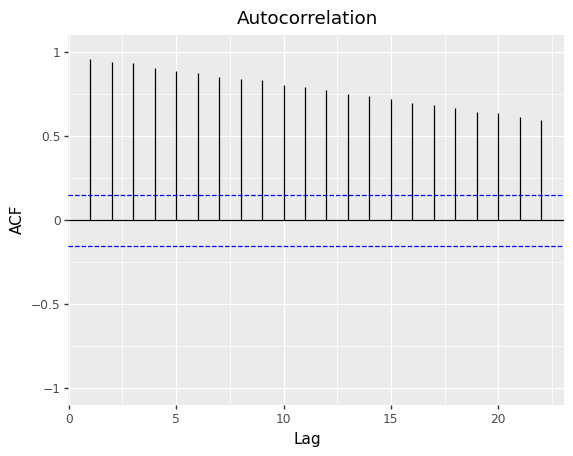

In [3]:
from scientisttseries.tsaplots import ggacf,ggpacf
# Autocorrelation simple
p1 = ggacf(df.TOTPHARSA,alpha=0.05,zero=False)
print(p1)

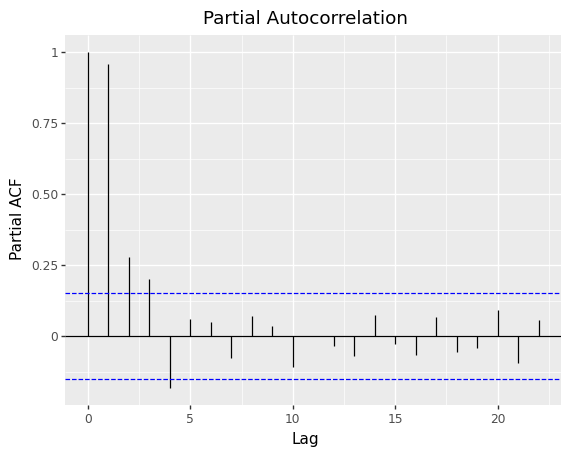

In [4]:
# Autocorrelation partielle
p2 = ggpacf(df.TOTPHARSA)
print(p2)

## Dickey - Fuller Test (DF)

* Modèle [1] : Modèle sans constante, ni tendance :  

$$X_{t} = \phi_{1}X_{t-1}+\varepsilon_{t}$$

In [5]:
# Modèle [1] - Modèle sans constante, ni tendance
from scientisttseries.uniroot import DF
df1 = DF(df.TOTPHARSA,typ="none")

In [6]:
from scientisttseries.uniroot import summaryDF
summaryDF(df1)

################################################################################
#                       Dickey - Fuller Test Unit Root Test                    #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.732e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                   2.66e-197
Time:                        22:46:47   Log-Likelihood:                         -1182.5
No. Observations:                 167   AIC:                                      2367.
Df Residuals:                     166   BIC:                                      2370.
Df Model:                           1              

* Modèle [2] : Modèle avec constante, sans tendance : 

$$X_{t} = \phi_{1}X_{t-1}+c+\varepsilon_{t}$$

In [7]:
# Molèle [2]
df2 = DF(df.TOTPHARSA,typ="drift")
summaryDF(df2)

################################################################################
#                       Dickey - Fuller Test Unit Root Test                    #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     3722.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          3.99e-115
Time:                        22:46:47   Log-Likelihood:                -1181.2
No. Observations:                 167   AIC:                             2366.
Df Residuals:                     165   BIC:                             2373.
Df Model:                           1                                         
Covariance Type:            nonrobust       

* Modèle [3] : 

$$X_{t} = \phi_{1}X_{t-1}+c+bt+\varepsilon_{t}$$

In [8]:
# Molèle [3]
df3 = DF(df.TOTPHARSA,typ="trend")
summaryDF(df3)

################################################################################
#                       Dickey - Fuller Test Unit Root Test                    #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     4078.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.47e-140
Time:                        22:46:47   Log-Likelihood:                -1117.1
No. Observations:                 167   AIC:                             2240.
Df Residuals:                     164   BIC:                             2250.
Df Model:                           2                                         
Covariance Type:            nonrobust       

## Augmented Dickey - Fuller (ADF)

* Modèle [1] - Modèle sans constante, ni tendance

$$
\Delta X_{t} = \phi_{1} X_{t-1} + \displaystyle \sum_{j=1}^{j=p}\alpha_{j}\Delta X_{t-j} + \varepsilon_{t}
$$

In [9]:
# ADF - modèle [1]
from scientisttseries.uniroot import ADF

adf1 = ADF(df.TOTPHARSA,typ ="none",lags=1)

In [10]:
from scientisttseries.uniroot import summaryADF
summaryADF(adf1)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                diff(y)   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              29.32
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    1.30e-11
Time:                        22:46:47   Log-Likelihood:                         -1150.8
No. Observations:                 166   AIC:                                      2306.
Df Residuals:                     164   BIC:                                      2312.
Df Model:                           2              

* Modèle [2] - Modèle avec constante, sans tendance:

$$
\Delta X_{t} = \phi_{1} X_{t-1} + \displaystyle \sum_{j=1}^{j=p}\alpha_{j}\Delta X_{t-j} + c+\varepsilon_{t}
$$

In [11]:
adf2 = ADF(df.TOTPHARSA,typ ="drift",lags=1)
summaryADF(adf2)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     29.13
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.53e-11
Time:                        22:46:47   Log-Likelihood:                -1149.9
No. Observations:                 166   AIC:                             2306.
Df Residuals:                     163   BIC:                             2315.
Df Model:                           2                                         
Covariance Type:            nonrobust       

* Modèle [3] - modèle avec constante et tendance:

$$
\Delta X_{t} = \phi_{1} X_{t-1} + \displaystyle \sum_{j=1}^{j=p}\alpha_{j}\Delta X_{t-j} + c+bt+\varepsilon_{t}
$$

In [12]:
adf3 = ADF(df.TOTPHARSA,typ ="trend",lags=1)
summaryADF(adf3)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           2.75e-27
Time:                        22:46:47   Log-Likelihood:                -1110.5
No. Observations:                 166   AIC:                             2229.
Df Residuals:                     162   BIC:                             2241.
Df Model:                           3                                         
Covariance Type:            nonrobust       

### Avec lags supperieur à 1

In [13]:
adf4 = ADF(df.TOTPHARSA,typ="none",lags=2,selectlags="Fixed")
summaryADF(adf4)


################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                diff(y)   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.512
Method:                 Least Squares   F-statistic:                              58.77
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    9.25e-26
Time:                        22:46:47   Log-Likelihood:                         -1108.8
No. Observations:                 165   AIC:                                      2224.
Df Residuals:                     162   BIC:                                      2233.
Df Model:                           3              

In [14]:
adf5 = ADF(df.TOTPHARSA,typ="drift",lags=2,selectlags="Fixed")
summaryADF(adf5)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     58.93
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           9.17e-26
Time:                        22:46:47   Log-Likelihood:                -1107.5
No. Observations:                 165   AIC:                             2223.
Df Residuals:                     161   BIC:                             2236.
Df Model:                           3                                         
Covariance Type:            nonrobust       

In [15]:
adf6 = ADF(df.TOTPHARSA,typ="trend",lags=2,selectlags="Fixed")
summaryADF(adf6)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     59.28
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.27e-30
Time:                        22:46:47   Log-Likelihood:                -1093.7
No. Observations:                 165   AIC:                             2197.
Df Residuals:                     160   BIC:                             2213.
Df Model:                           4                                         
Covariance Type:            nonrobust       

In [16]:
adf7 = ADF(df.TOTPHARSA,typ="none",lags=4,selectlags="AIC")
summaryADF(adf7)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                diff(y)   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              40.28
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    1.47e-26
Time:                        22:46:47   Log-Likelihood:                         -1089.3
No. Observations:                 163   AIC:                                      2189.
Df Residuals:                     158   BIC:                                      2204.
Df Model:                           5              

In [17]:
adf8 = ADF(df.TOTPHARSA,typ="drift",lags=4,selectlags="AIC")
summaryADF(adf8)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     40.78
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           9.68e-27
Time:                        22:46:47   Log-Likelihood:                -1087.6
No. Observations:                 163   AIC:                             2187.
Df Residuals:                     157   BIC:                             2206.
Df Model:                           5                                         
Covariance Type:            nonrobust       

In [18]:
adf9 = ADF(df.TOTPHARSA,typ="trend",lags=4,selectlags="AIC")
summaryADF(adf9)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           3.15e-29
Time:                        22:46:47   Log-Likelihood:                -1079.5
No. Observations:                 163   AIC:                             2173.
Df Residuals:                     156   BIC:                             2195.
Df Model:                           6                                         
Covariance Type:            nonrobust       

### AICC

In [19]:
adf10 = ADF(df.TOTPHARSA,typ="none",lags=4,selectlags="AICC")
summaryADF(adf10)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                diff(y)   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              40.28
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    1.47e-26
Time:                        22:46:47   Log-Likelihood:                         -1089.3
No. Observations:                 163   AIC:                                      2189.
Df Residuals:                     158   BIC:                                      2204.
Df Model:                           5              

In [20]:
adf11 = ADF(df.TOTPHARSA,typ="drift",lags=4,selectlags="AICC")
summaryADF(adf11)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     40.78
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           9.68e-27
Time:                        22:46:47   Log-Likelihood:                -1087.6
No. Observations:                 163   AIC:                             2187.
Df Residuals:                     157   BIC:                             2206.
Df Model:                           5                                         
Covariance Type:            nonrobust       

In [21]:
adf12 = ADF(df.TOTPHARSA,typ="trend",lags=4,selectlags="BIC")
summaryADF(adf12)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           3.15e-29
Time:                        22:46:47   Log-Likelihood:                -1079.5
No. Observations:                 163   AIC:                             2173.
Df Residuals:                     156   BIC:                             2195.
Df Model:                           6                                         
Covariance Type:            nonrobust       

#### BIC

In [22]:
adf13 = ADF(df.TOTPHARSA,typ="none",lags=4,selectlags="BIC")
summaryADF(adf13)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                                 OLS Regression Results                                
Dep. Variable:                diff(y)   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              40.28
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                    1.47e-26
Time:                        22:46:47   Log-Likelihood:                         -1089.3
No. Observations:                 163   AIC:                                      2189.
Df Residuals:                     158   BIC:                                      2204.
Df Model:                           5              

In [23]:
adf14 = ADF(df.TOTPHARSA,typ="drift",lags=4,selectlags="BIC")
summaryADF(adf14)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     40.78
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           9.68e-27
Time:                        22:46:47   Log-Likelihood:                -1087.6
No. Observations:                 163   AIC:                             2187.
Df Residuals:                     157   BIC:                             2206.
Df Model:                           5                                         
Covariance Type:            nonrobust       

In [24]:
adf15 = ADF(df.TOTPHARSA,typ="trend",lags=4,selectlags="BIC")
summaryADF(adf15)

################################################################################
#                   Augmented Dickey - Fuller Unit Root Test                   #
################################################################################


                            OLS Regression Results                            
Dep. Variable:                diff(y)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           3.15e-29
Time:                        22:46:47   Log-Likelihood:                -1079.5
No. Observations:                 163   AIC:                             2173.
Df Residuals:                     156   BIC:                             2195.
Df Model:                           6                                         
Covariance Type:            nonrobust       